特征与VISIBILITY的相关系数（绝对值排序）:
RELHUMIDITY            0.311094
MINRELHUMIDITY         0.306294
AUTOEVAPGAUGE          0.272578
INSTANTWINDV           0.212944
HEXMAXWINDV            0.198315
WINDV10MS              0.162007
MAXWINDV10MS           0.156455
AUTOPRECIPAMOUNT       0.156363
GRASSLANDMAXTEMP       0.152857
WINDVELOCITY           0.149224
GRASSLANDTEMP          0.133960
GRASSLANDMINTEMP       0.125178
SURFACEMAXTEMP         0.122262
CLOUDAMOUNT            0.119798
SURFACETEMP            0.113888
SURFACEMINTEMP         0.109882
TEMP5CM                0.103854
DEWTEMP                0.102545
KEYID                  0.100039
SEALEVELPRESS          0.089461
STATIONPRESS           0.089301
MAXSTATIONPRESS        0.088715
MINSTATIONPRESS        0.088367
TEMP10CM               0.088175
MAXTEMP                0.088048
DRYBULBTEMP            0.085898
MINTEMP                0.080376
TEMP15CM               0.075638
TEMP80CM               0.075035
TEMP40CM               0.073499
TEMP20CM     

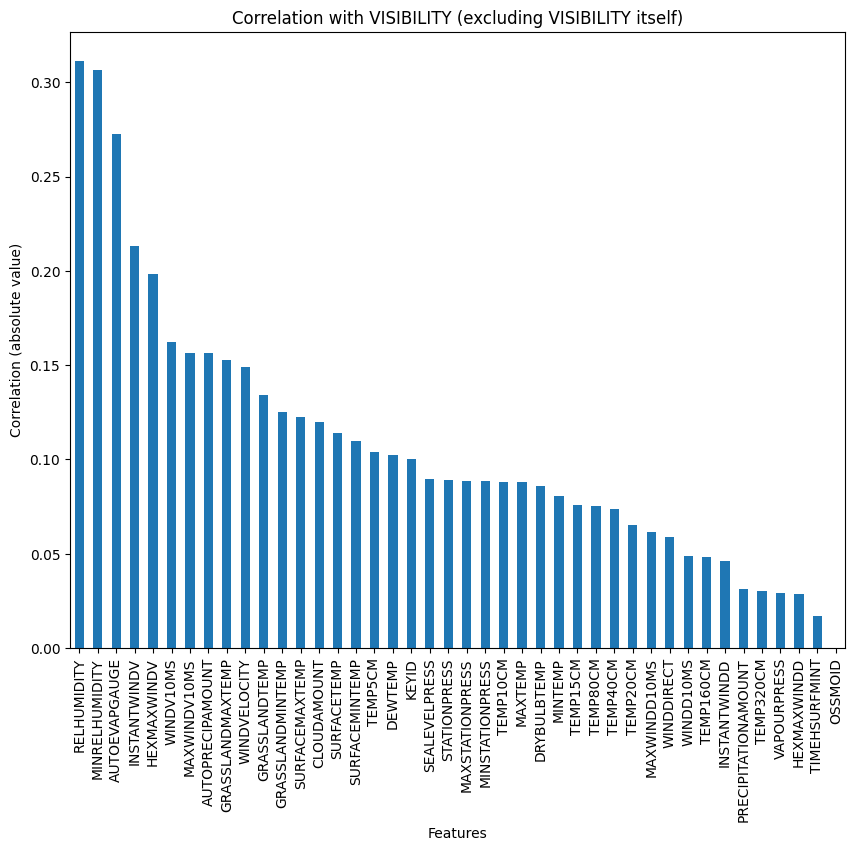

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据集，并跳过第一行，使用第二行作为标题
file_path = r"Course Project\原始数据集.xlsx"  # 替换为你的数据集路径
data = pd.read_excel(file_path, header=[1])

# 将非数字符号转换为0
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# 选择一个特征进行相关性分析
target_feature = "VISIBILITY"

# 计算特征与其他所有特征的相关系数
correlation_with_target = data.corr()[target_feature]

# 排除目标特征本身
correlation_with_target = correlation_with_target.drop(target_feature)

# 根据相关性的绝对值进行排序
correlation_with_target_sorted = correlation_with_target.abs().sort_values(ascending=False)

# 打印相关系数
print("特征与VISIBILITY的相关系数（绝对值排序）:")
print(correlation_with_target_sorted)

# 绘制相关性图像
plt.figure(figsize=(10, 8))
correlation_with_target_sorted.plot(kind='bar')
plt.title('Correlation with VISIBILITY (excluding VISIBILITY itself)')
plt.xlabel('Features')
plt.ylabel('Correlation (absolute value)')
plt.show()


                             mean            std
WINDDIRECT           1.181592e+02     101.269424
RELHUMIDITY          7.296193e+01      16.249699
SURFACEMINTEMP       2.367531e+02      87.986111
GRASSLANDMAXTEMP     2.664373e+02     109.465061
AUTOPRECIPAMOUNT     1.246381e+00       9.825435
MINSTATIONPRESS      1.006624e+04     334.985656
HEXMAXWINDD          1.147681e+02      93.348404
DEWTEMP              1.588619e+02      67.553064
INSTANTWINDV         2.471689e+01      15.292684
SURFACETEMP          2.488987e+02      95.399798
TEMP5CM              2.357775e+02      69.557440
STATIONPRESS         1.006903e+04     335.097037
SURFACEMAXTEMP       2.610903e+02     102.653918
TEMP20CM             2.335984e+02      52.920632
WINDV10MS            1.982949e+01       9.918758
INSTANTWINDD         1.238539e+02     103.129325
SEALEVELPRESS        1.014406e+04     337.786109
VISIBILITY           2.204960e+02     110.785058
MAXTEMP              2.173804e+02      58.010077
TEMP160CM           

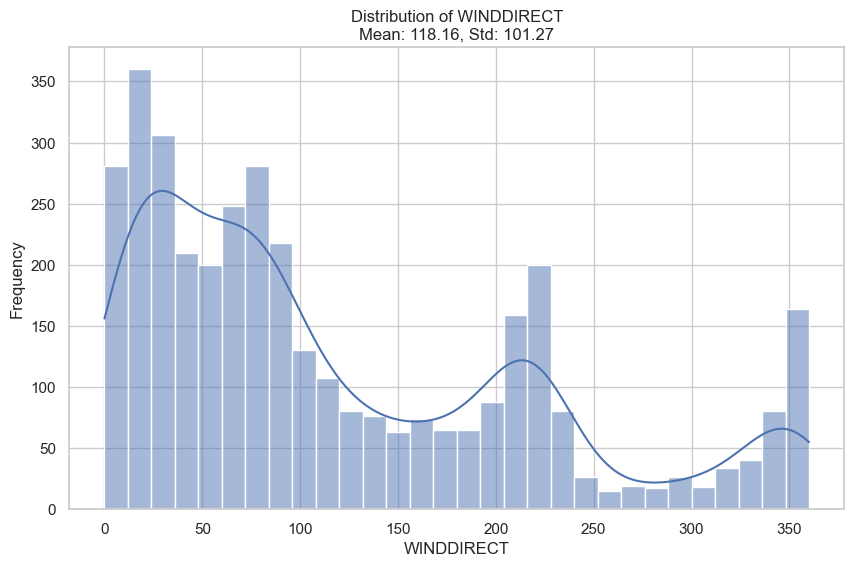

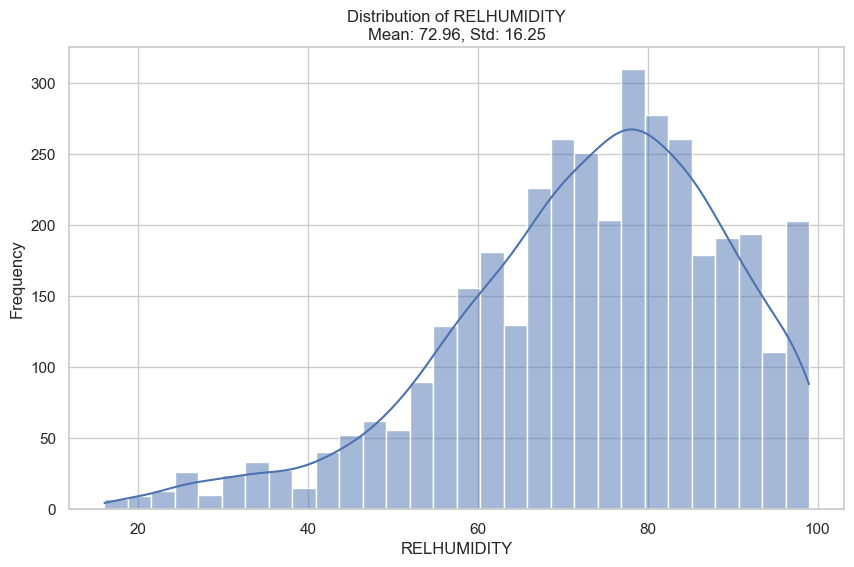

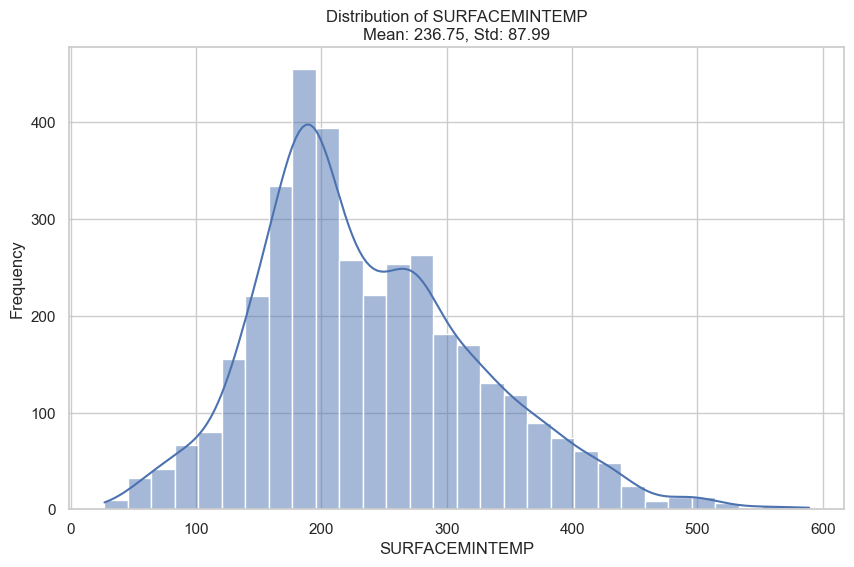

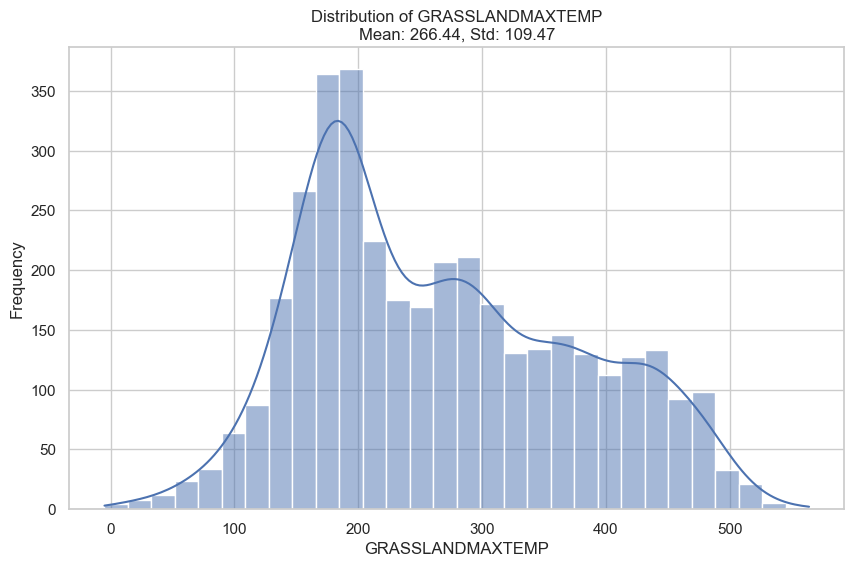

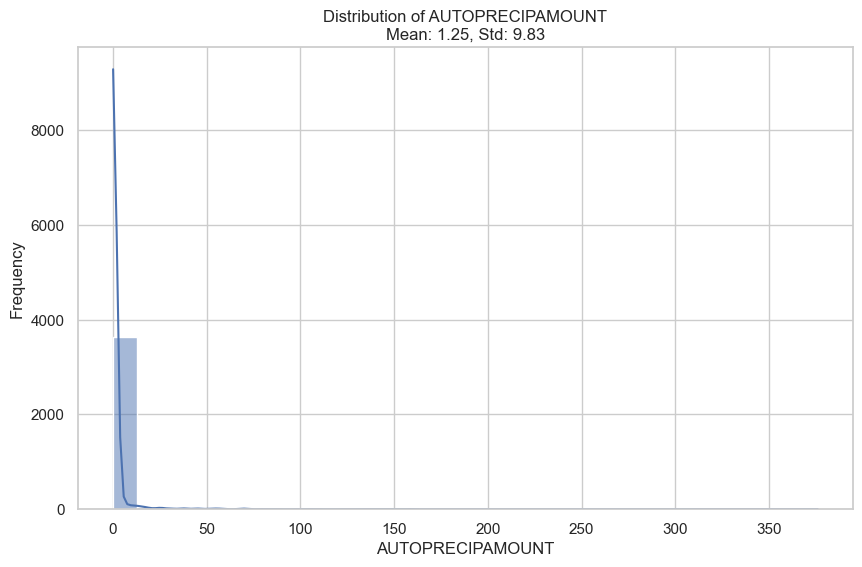

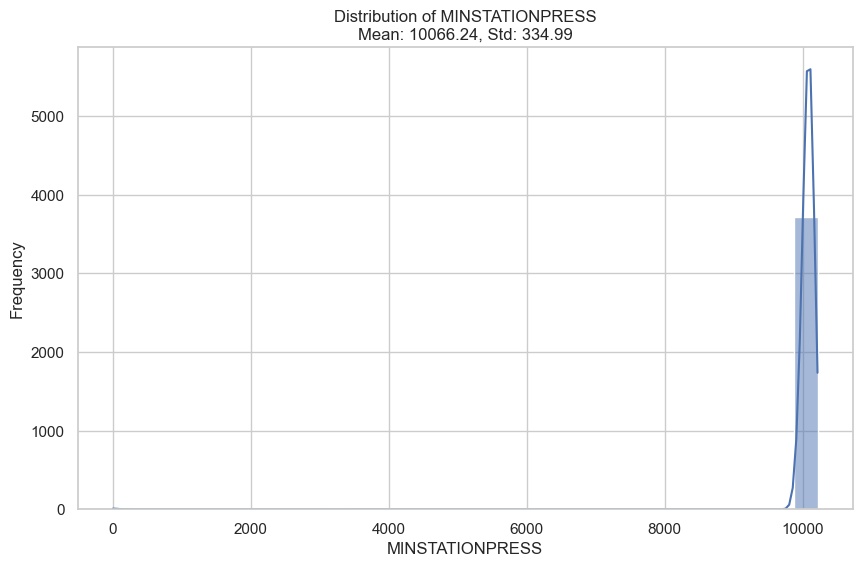

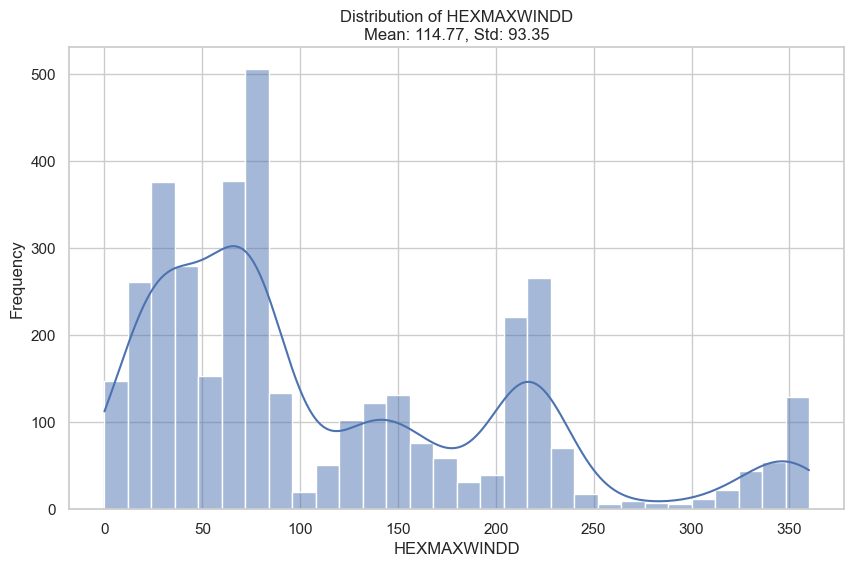

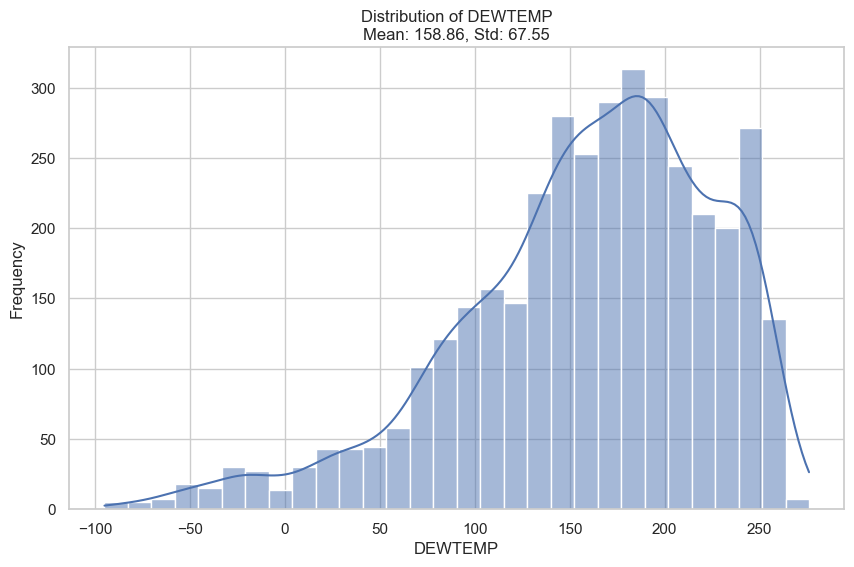

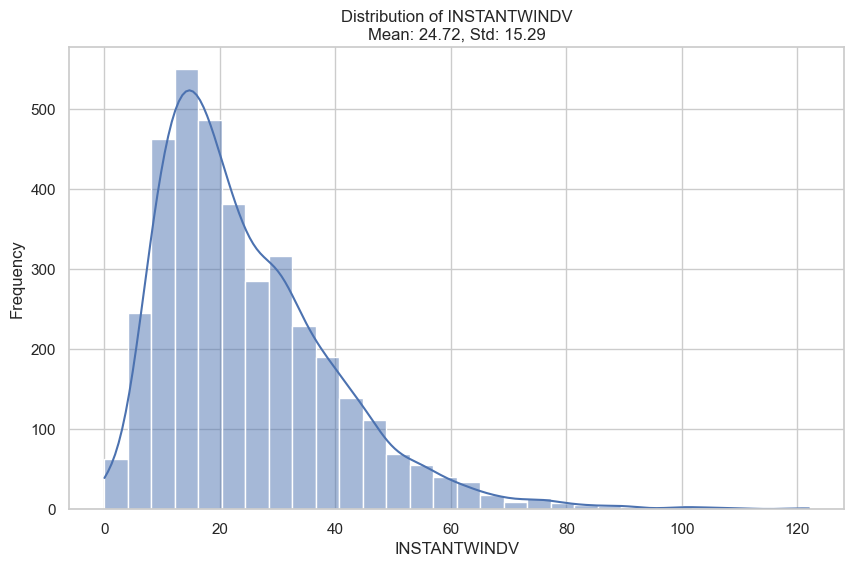

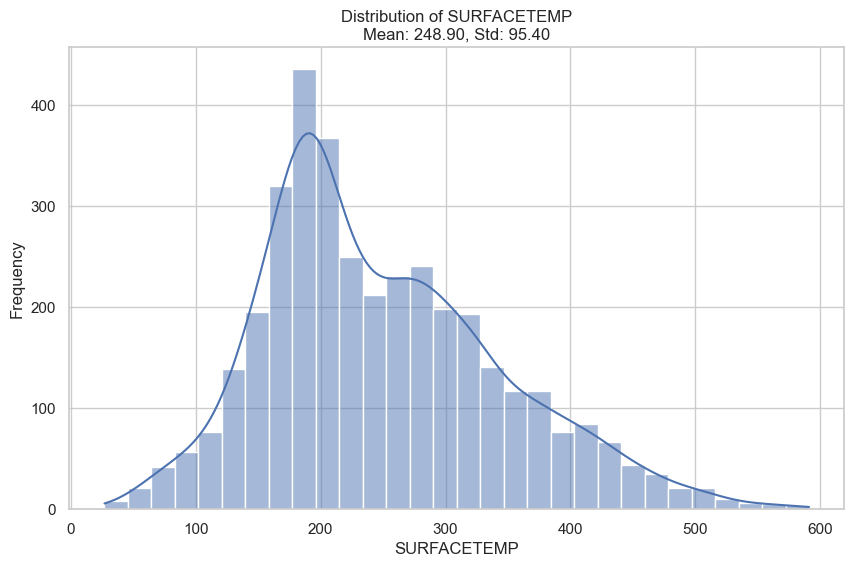

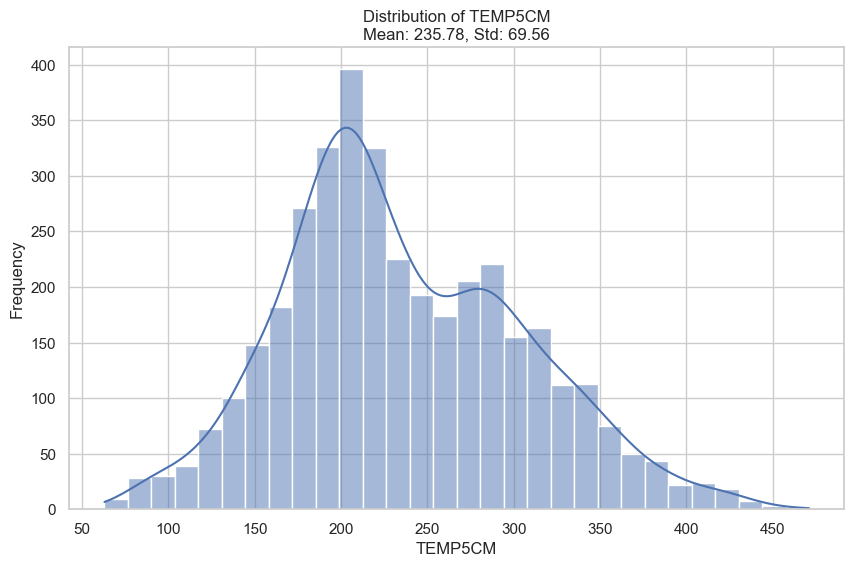

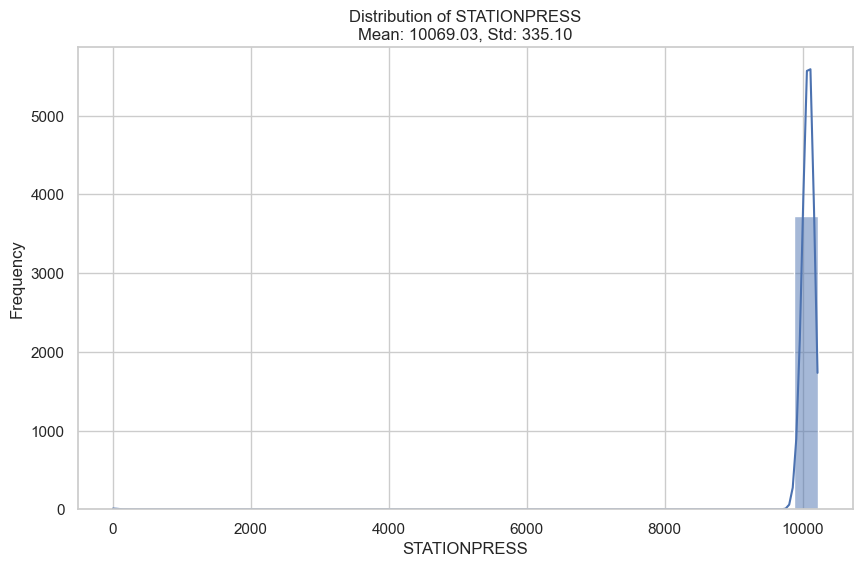

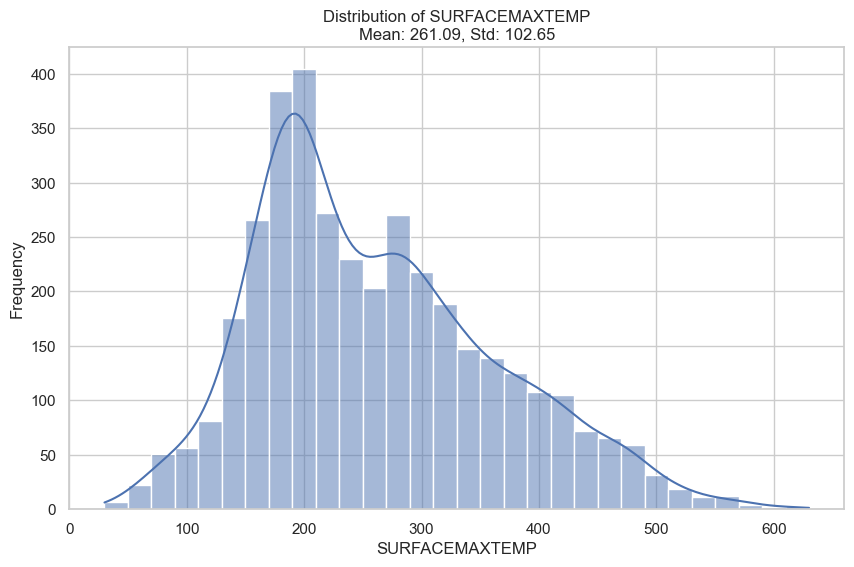

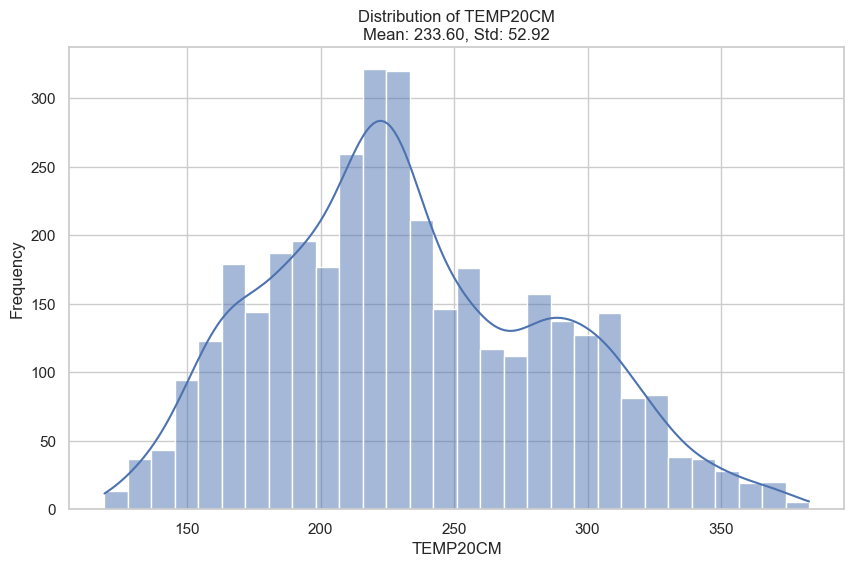

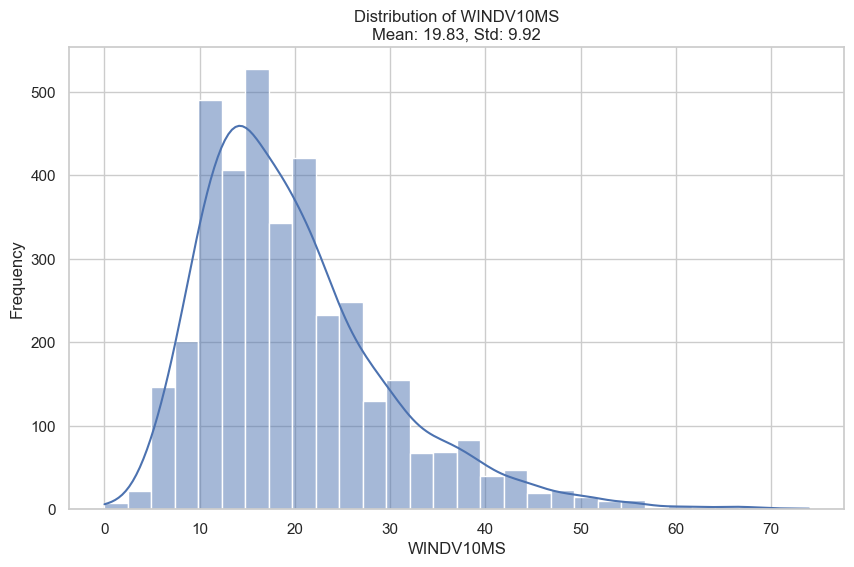

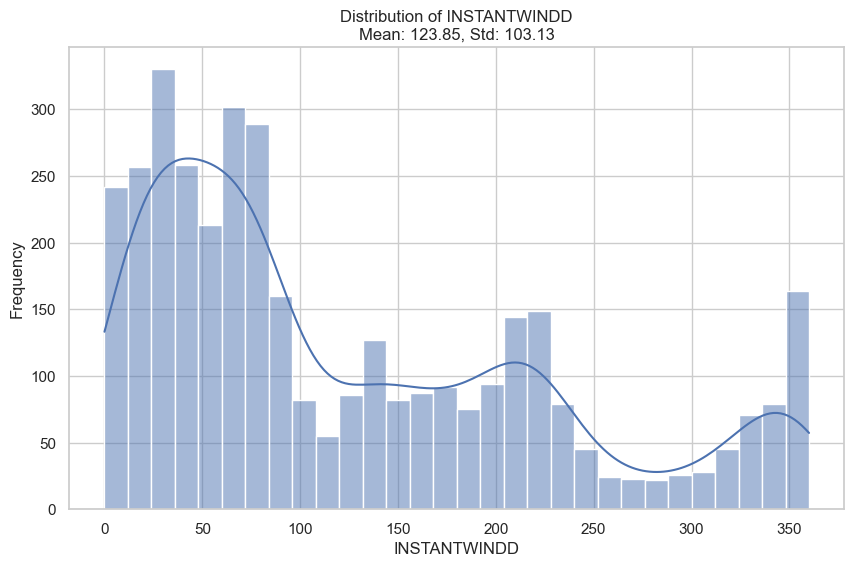

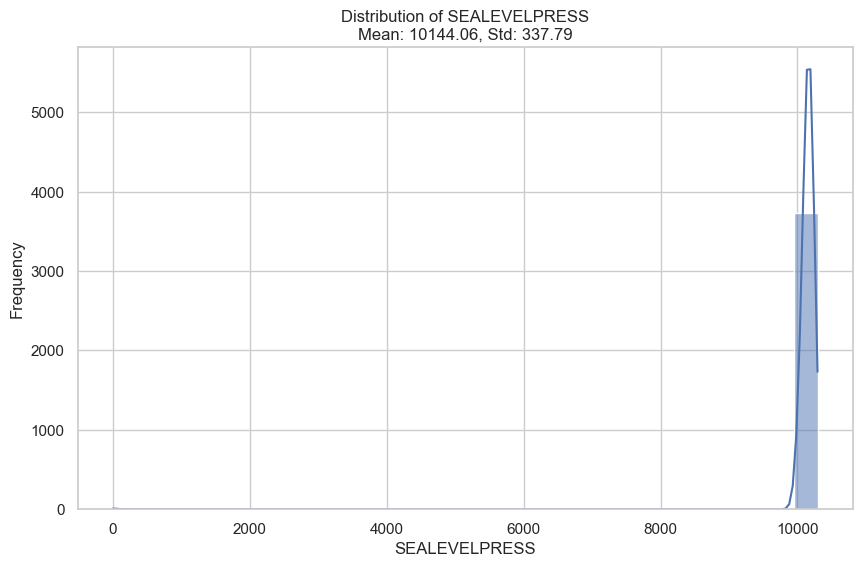

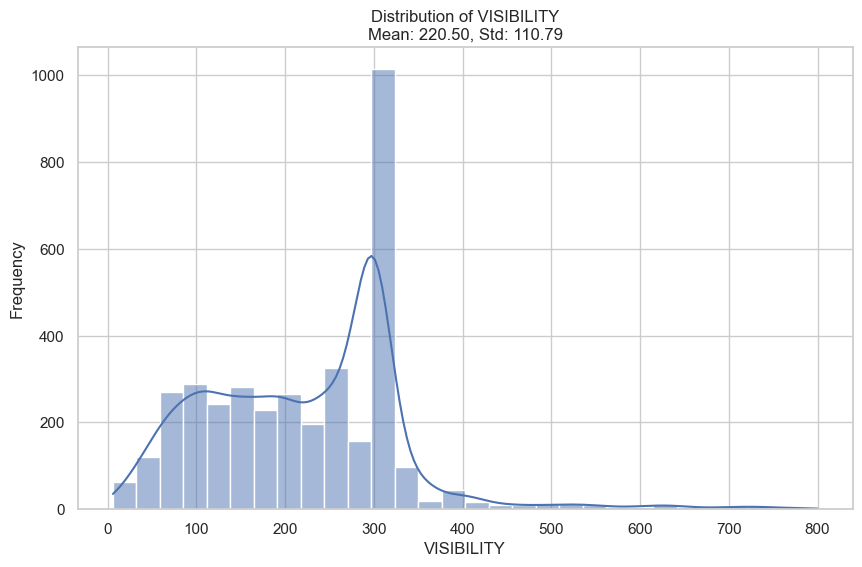

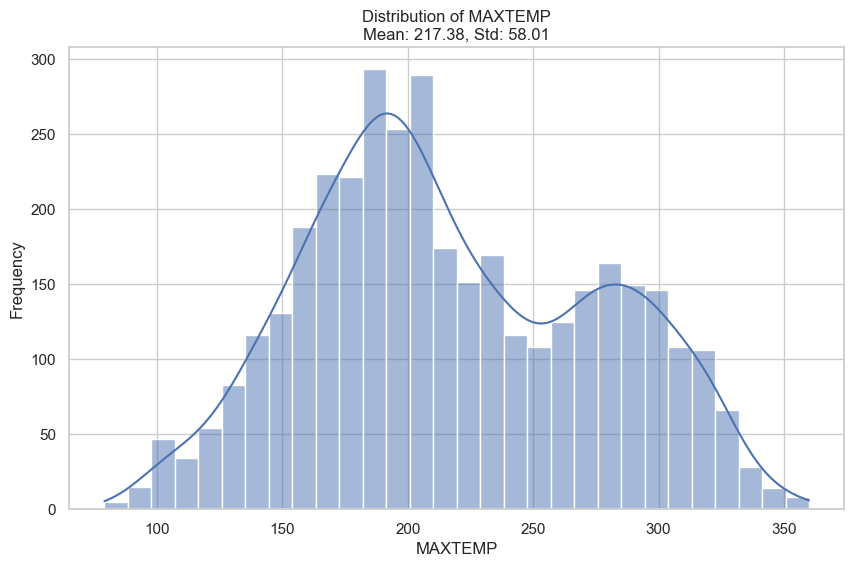

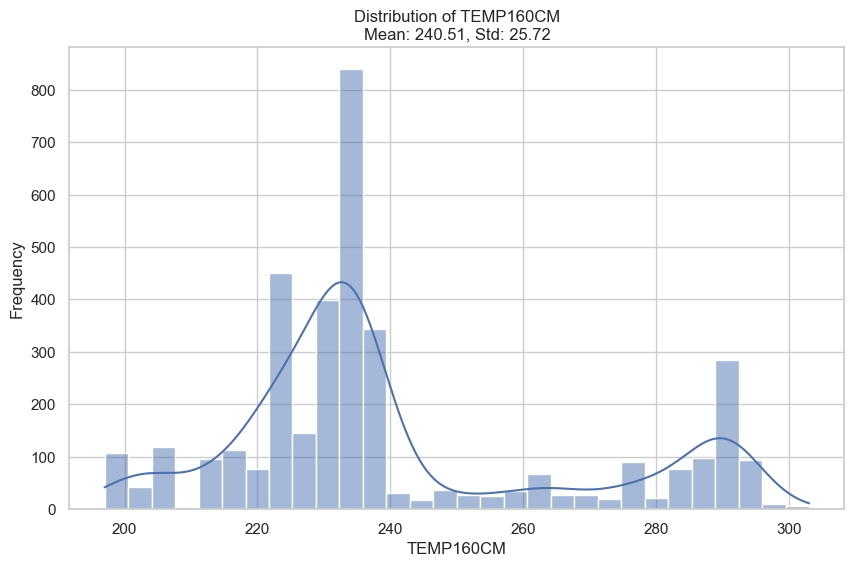

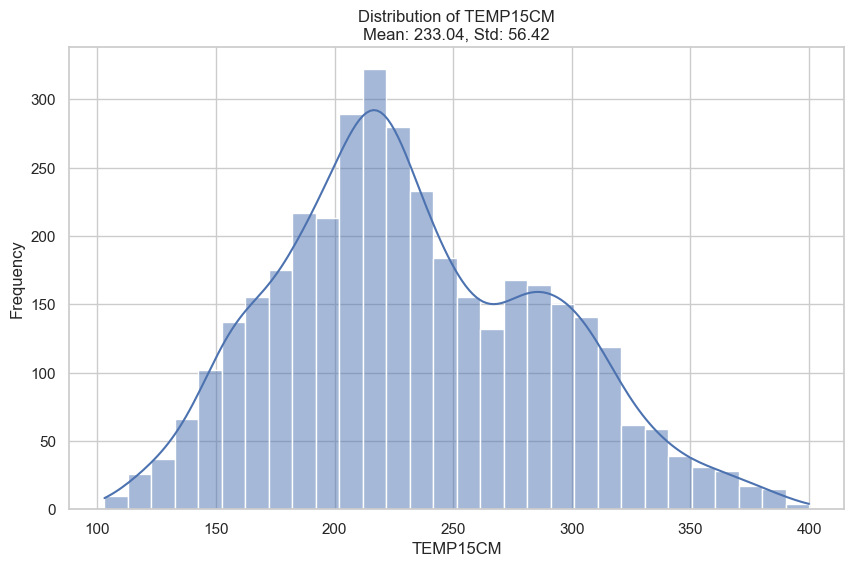

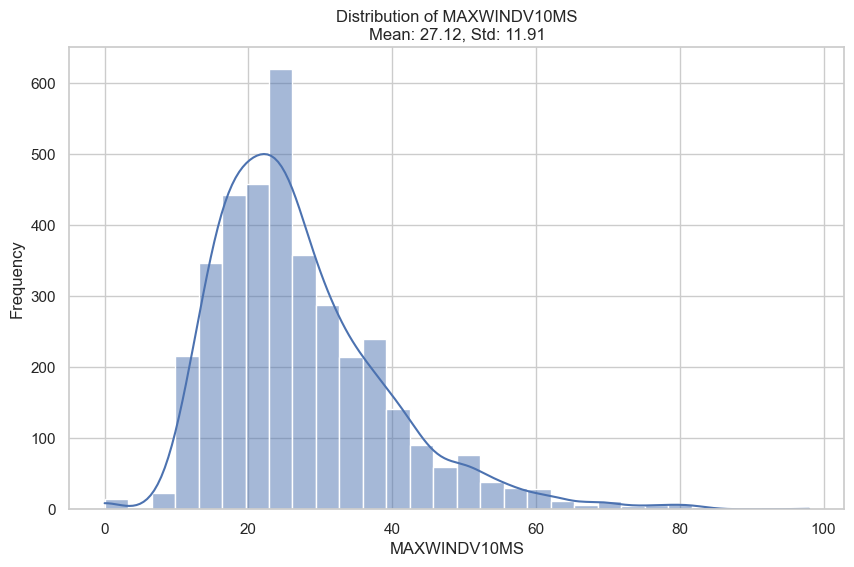

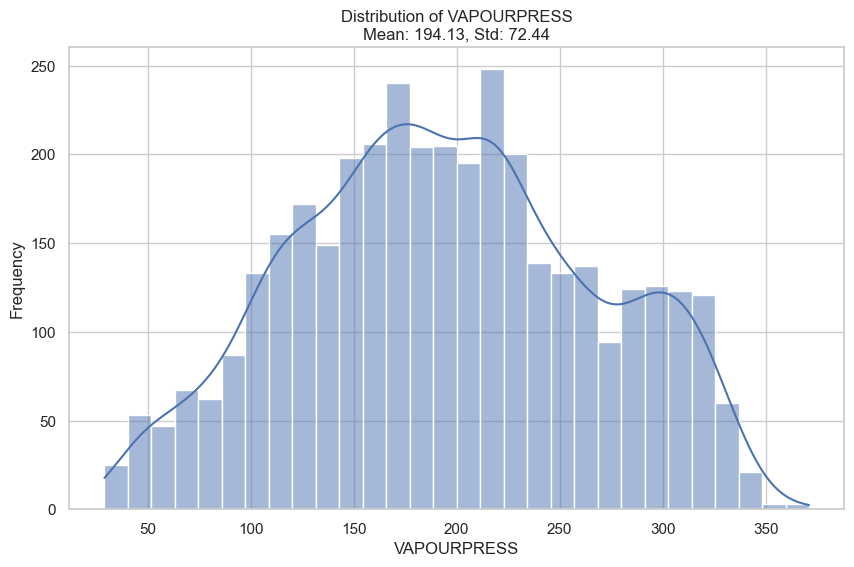

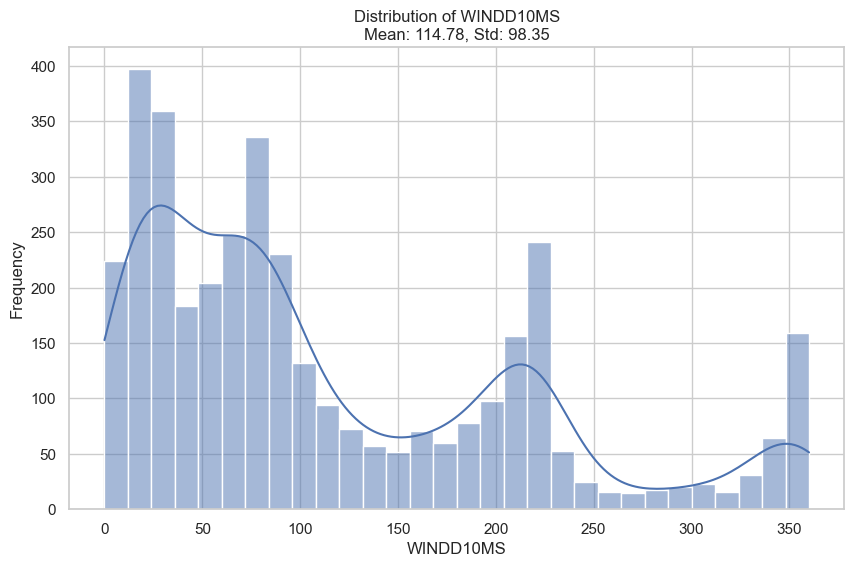

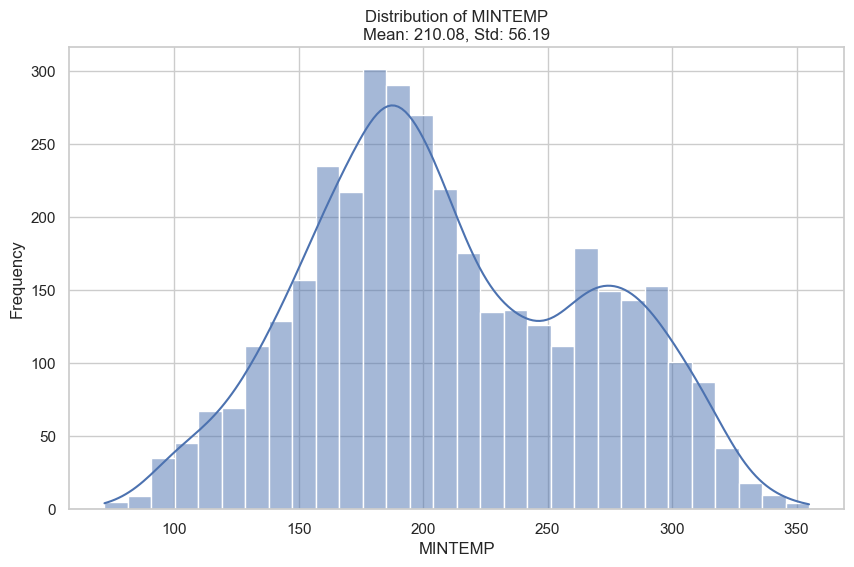

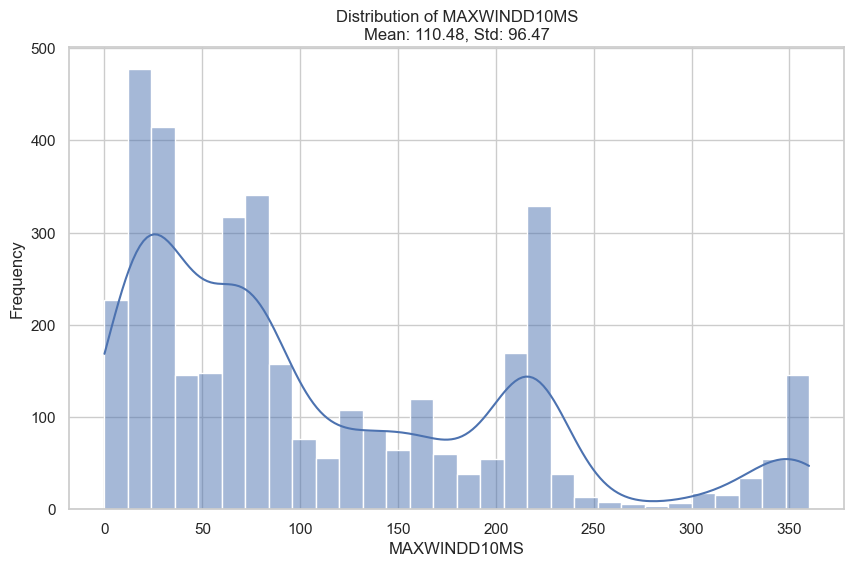

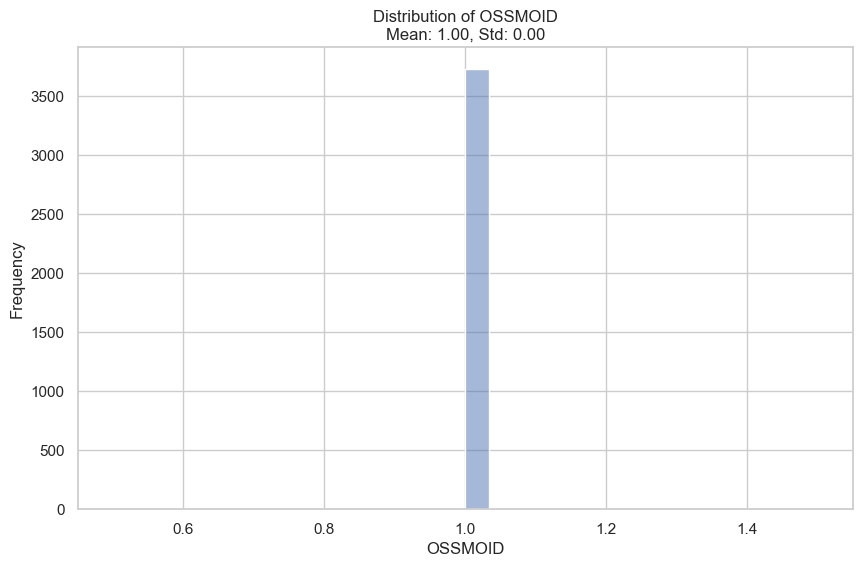

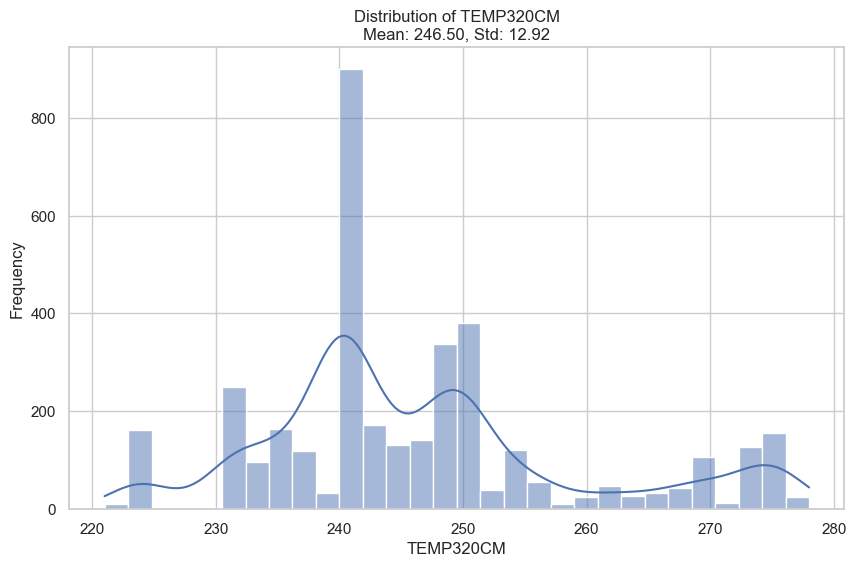

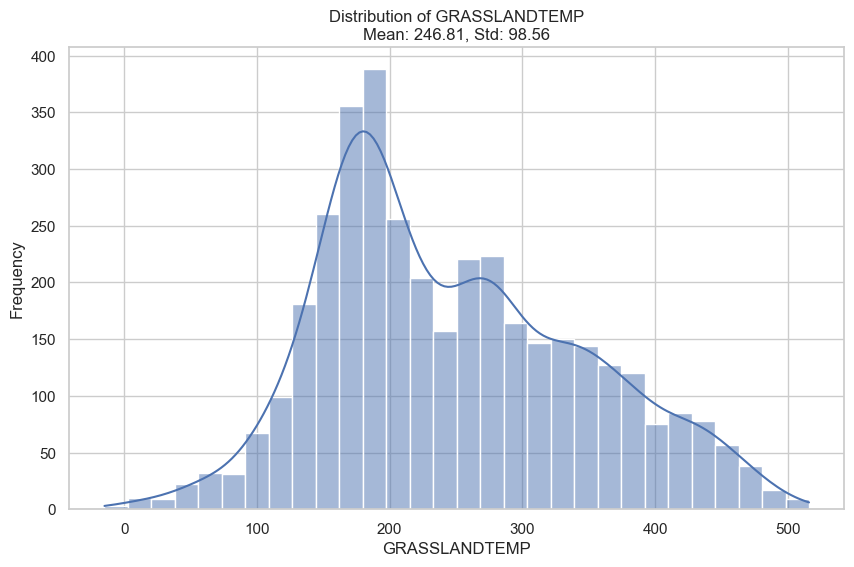

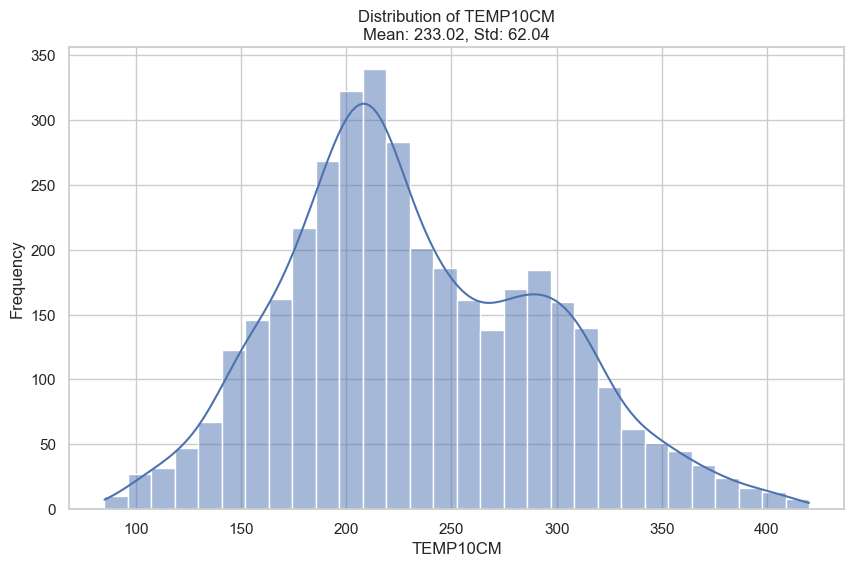

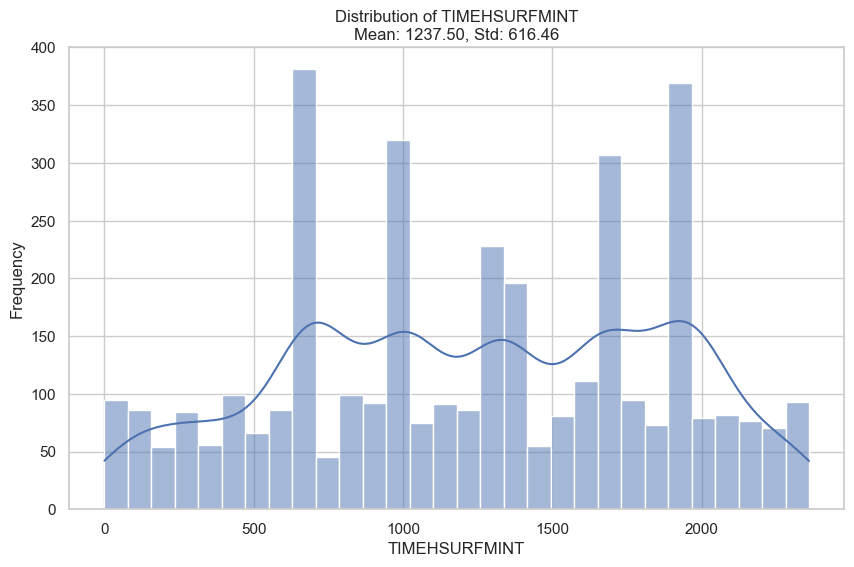

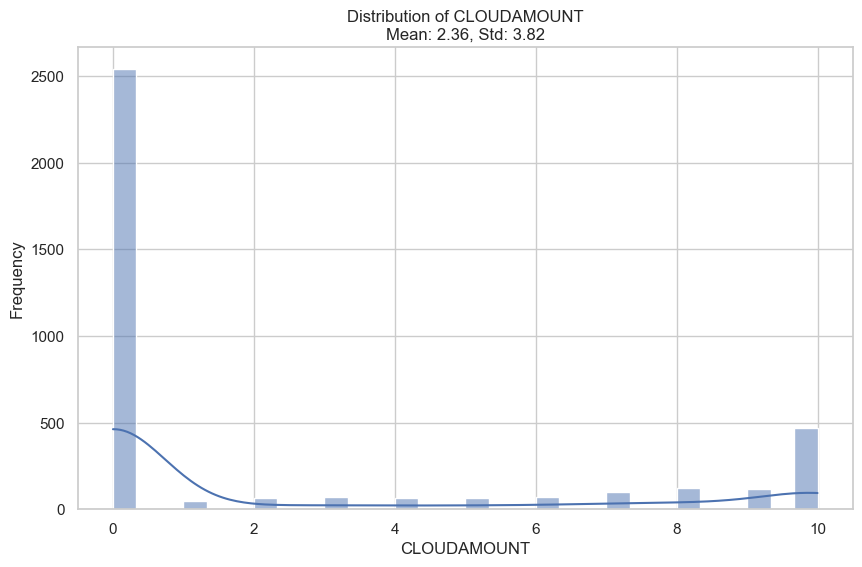

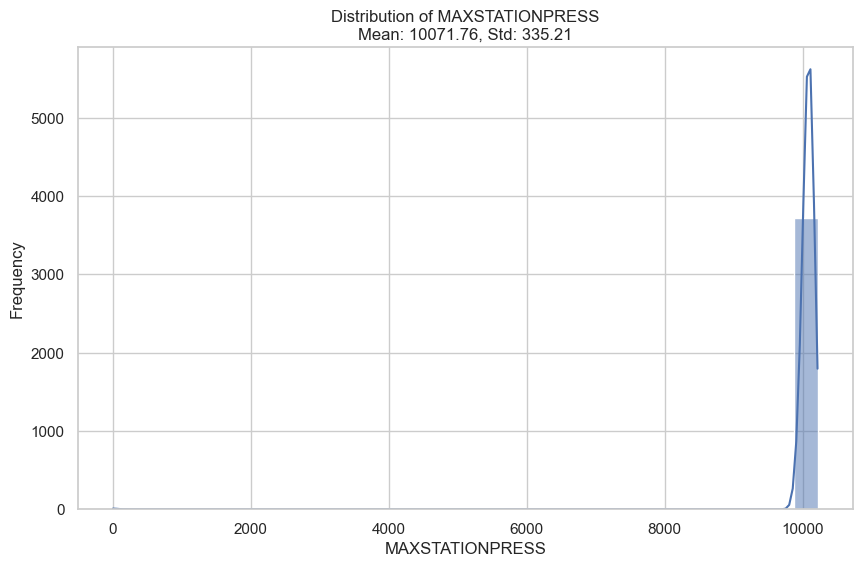

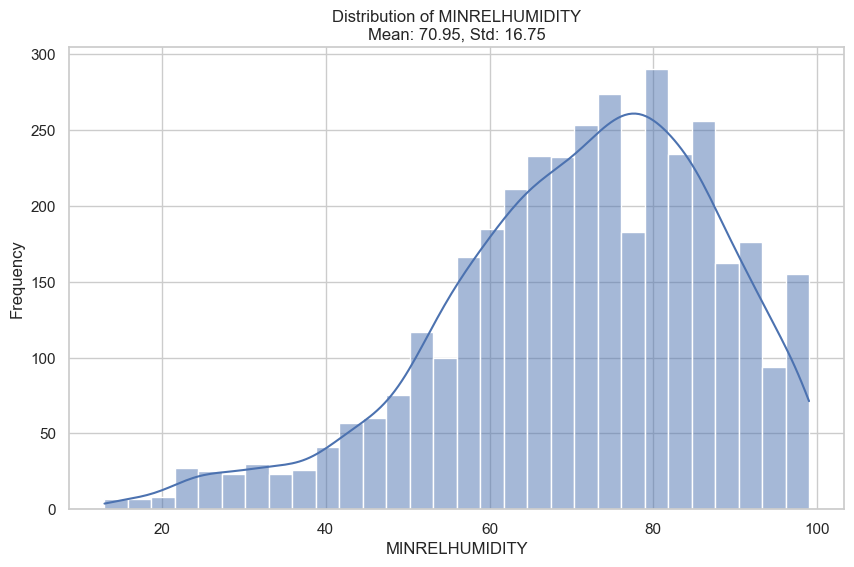

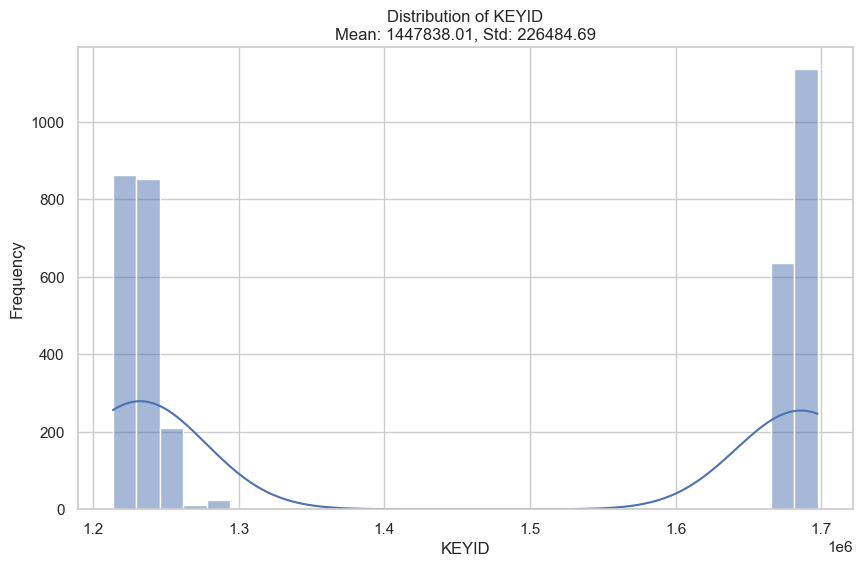

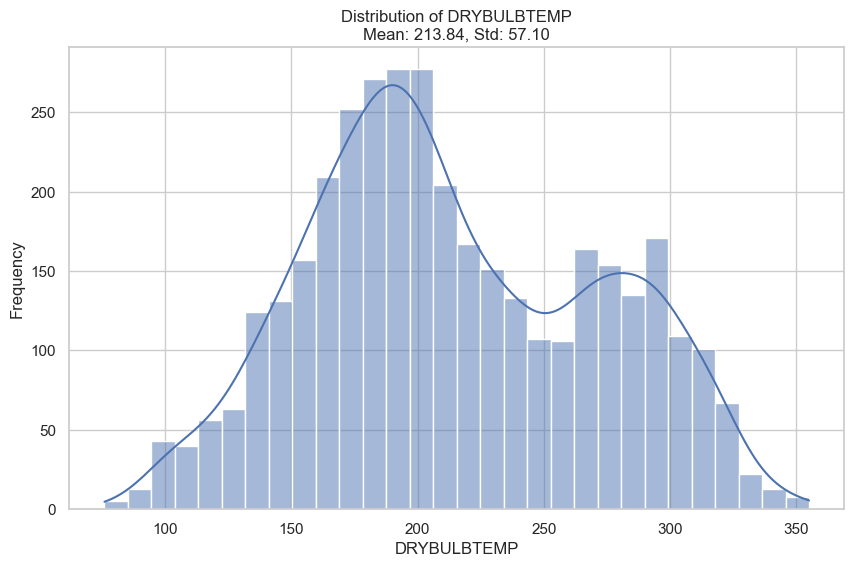

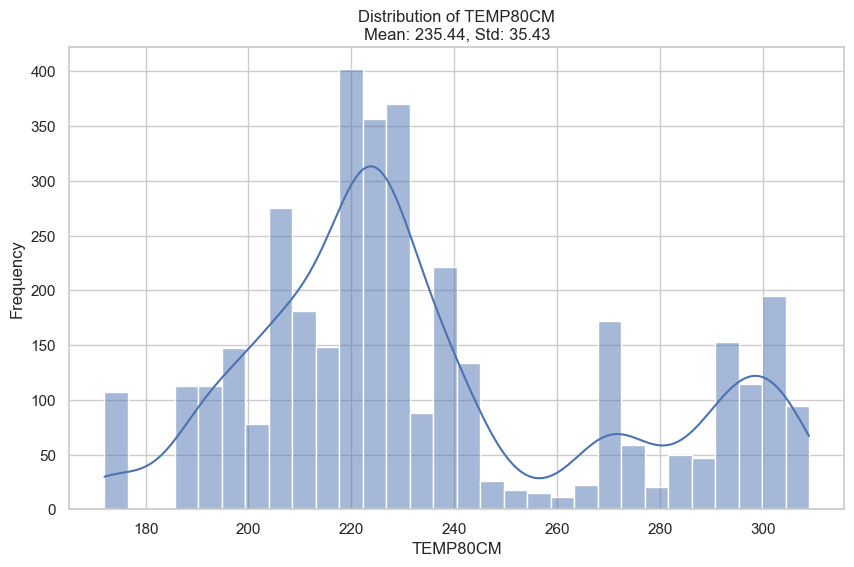

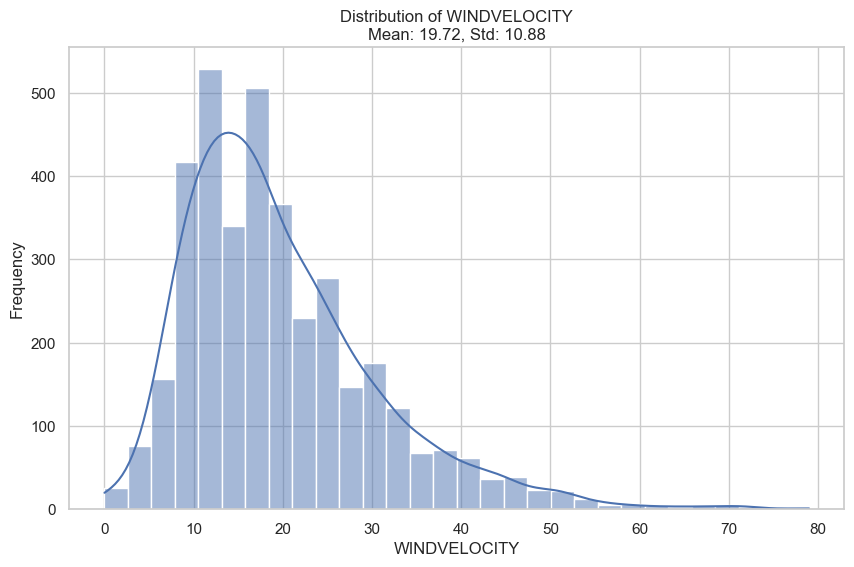

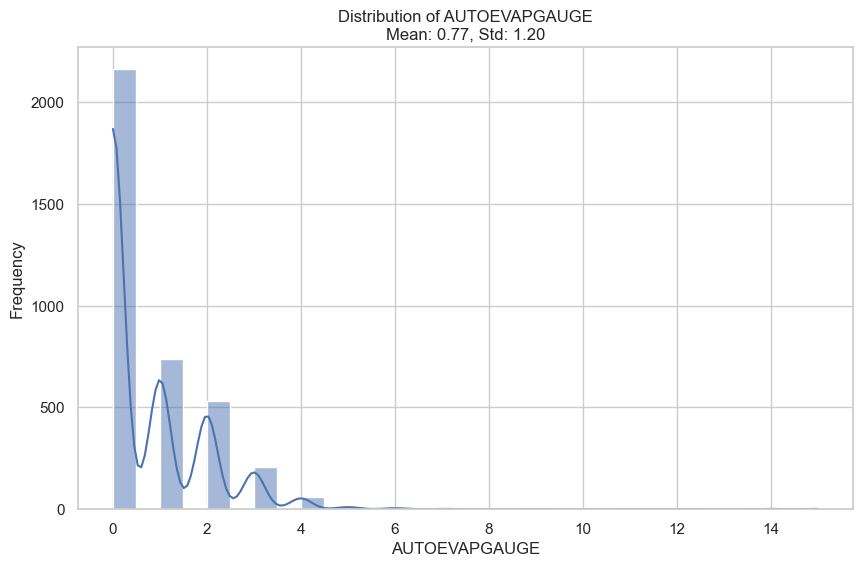

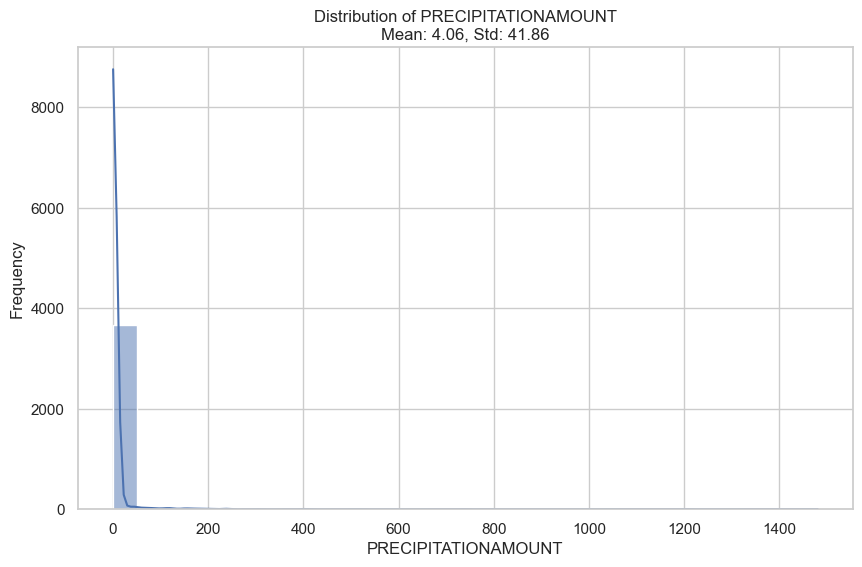

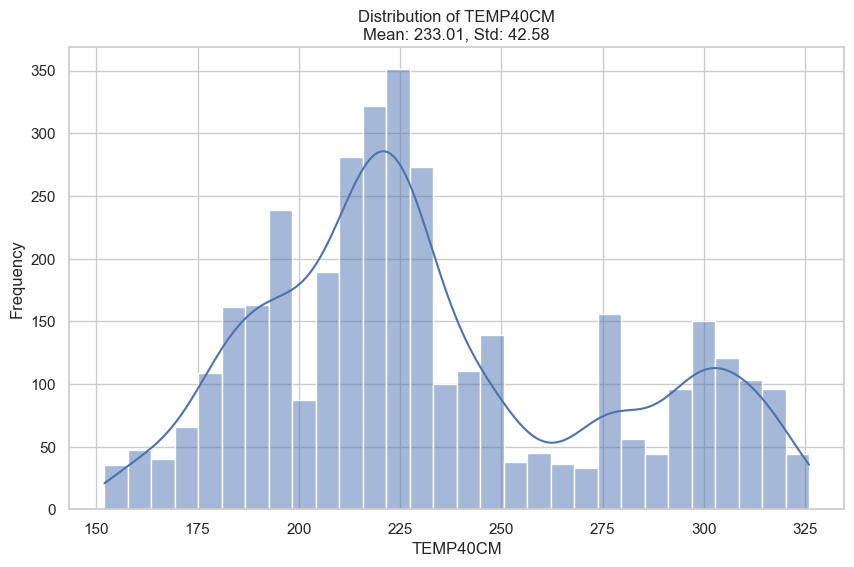

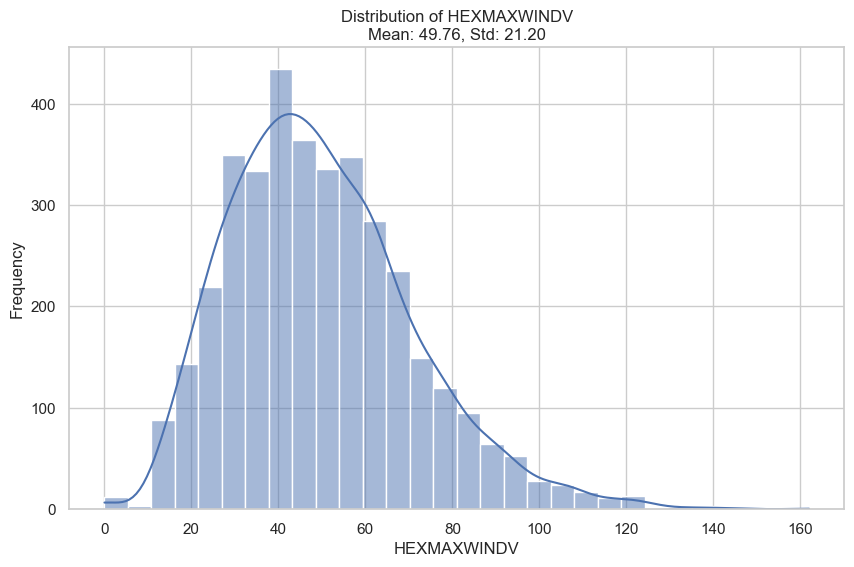

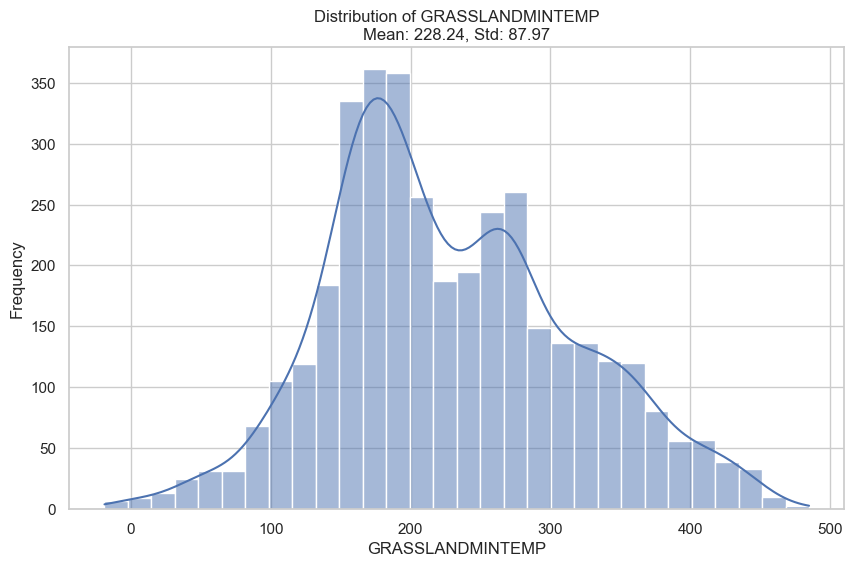

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据集，并跳过第一行，使用第二行作为标题
file_path = r"机器学习遥测数据集2.xlsx"  # 替换为你的数据集路径
data = pd.read_excel(file_path, header=[1])

# 将非数字符号转换为0
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# 计算每个特征的均值和标准差
mean_std = data.describe().loc[['mean', 'std']].T
print(mean_std)

# 设置图像的风格
sns.set(style="whitegrid")

# 绘制每个特征的数据分布图
for column in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}\nMean: {mean_std.loc[column, "mean"]:.2f}, Std: {mean_std.loc[column, "std"]:.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [9]:
import pandas as pd

# 加载数据集，并跳过第一行，使用第二行作为标题
file_path = r"机器学习遥测数据集2.xlsx"  # 替换为你的数据集路径
data = pd.read_excel(file_path, header=[1])

# 将非数字符号转换为0
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)

# 选择相关性高于0.15的特征
high_correlation_features = [
    "VISIBILITY",
    "RELHUMIDITY",
    "MINRELHUMIDITY",
    "INSTANTWINDV",
    "HEXMAXWINDV",
    "WINDV10MS",
    "MAXWINDV10MS",
    "AUTOPRECIPAMOUNT",
    "GRASSLANDMAXTEMP"
]

# 导出相关性高于0.15的特征数据集
high_correlation_data = data[high_correlation_features]
output_file_path = "high_correlation_data.xlsx"
high_correlation_data.to_excel(output_file_path, index=False)

print(f"相关性高于0.15的特征数据集已导出到文件: {output_file_path}")


相关性高于0.15的特征数据集已导出到文件: high_correlation_data.xlsx


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 创建 images 文件夹（如果不存在）
os.makedirs('images', exist_ok=True)

# Load the new dataset
new_dataset_path = 'high_correlation_data.xlsx'
high_correlation_data = pd.read_excel(new_dataset_path)

# Calculate the mean and standard deviation for each feature
mean_std = high_correlation_data.describe().loc[['mean', 'std']].T

# Plot the distribution for each feature
sns.set(style="whitegrid")
for column in high_correlation_data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(high_correlation_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}\nMean: {mean_std.loc[column, "mean"]:.2f}, Std: {mean_std.loc[column, "std"]:.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Save the figure
    image_path = os.path.join('images', f'{column}_distribution.png')
    plt.savefig(image_path)
    plt.close()
    print(f"Saved figure to {image_path}")

# Save the mean and standard deviation information
mean_std_output_file_path = "mean_std.xlsx"
mean_std.to_excel(mean_std_output_file_path)

print(f"Mean and standard deviation information saved to {mean_std_output_file_path}")


Saved figure to images\VISIBILITY_distribution.png
Saved figure to images\RELHUMIDITY_distribution.png
Saved figure to images\MINRELHUMIDITY_distribution.png
Saved figure to images\INSTANTWINDV_distribution.png
Saved figure to images\HEXMAXWINDV_distribution.png
Saved figure to images\WINDV10MS_distribution.png
Saved figure to images\MAXWINDV10MS_distribution.png
Saved figure to images\AUTOPRECIPAMOUNT_distribution.png
Saved figure to images\GRASSLANDMAXTEMP_distribution.png
Mean and standard deviation information saved to mean_std.xlsx


In [2]:
import pandas as pd

# 定义数据
data = {
    'Feature': [
        'VISIBILITY', 'RELHUMIDITY', 'MINRELHUMIDITY', 'AUTOEVAPGAUGE', 'INSTANTWINDV',
        'HEXMAXWINDV', 'WINDV10MS', 'MAXWINDV10MS', 'AUTOPRECIPAMOUNT', 'GRASSLANDMAXTEMP'
    ],
    'Correlation': [
        1.000000, 0.311094, 0.306294, 0.272578, 0.212944, 0.198315, 0.162007, 0.156455, 0.156363, 0.152857
    ]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 输出到Excel文件
output_file = 'correlation_data.xlsx'
df.to_excel(output_file, index=False)

print(f"数据已输出到 {output_file}")


数据已输出到 correlation_data.xlsx
